Using TensorFlow backend.
1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


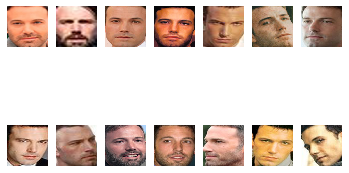

In [1]:
from os import listdir
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN


#extract a single face
def extract_face(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)

    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    #first face
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    #extract face
    pixels_face = pixels[y1:y2, x1:x2]
    image_face = Image.fromarray(pixels_face)
    image_face = image_face.resize(required_size)
    pixels_face_result = np.asarray(image_face)

    return pixels_face_result

folder = 'data/train/ben_afflek/'
# folder = 'test_myface/'
i = 1

for filename in listdir(folder):
    path = folder + filename
    face = extract_face(path)
    print(i, face.shape)

    #plot
    plt.subplot(2, 7, i)
    plt.axis('off')
    plt.imshow(face)
    i+=1
plt.show()

In [6]:
data = np.load('data/processed_data_Xtrain_ytrain_Xtest_ytest.npz')

In [12]:
X_train, y_train = data['arr_0'], data['arr_1']
X_test, y_test = data['arr_2'], data['arr_3']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((93, 160, 160, 3), (93,), (25, 160, 160, 3), (25,))

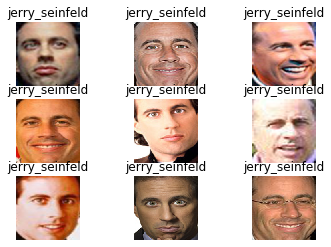

In [18]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.title(y_train[i])
    plt.imshow(X_train[i])
    i+=1

In [26]:
dir = ''
for i in range(X_test.shape[0]):
    img = Image.fromarray(X_test[i])
    img.save(dir + str(i) + y_test[i] + '.jpg')

In [22]:
X_train.shape[0]

93

In [27]:
face_pixels = X_train[0].astype('float32')

In [28]:
face_pixels.shape

(160, 160, 3)

In [30]:
samples = np.expand_dims(face_pixels, axis=0)

In [31]:
samples.shape

(1, 160, 160, 3)

In [33]:
face_pixels

array([[[ 21.,  18.,  22.],
        [ 19.,  17.,  21.],
        [ 15.,  15.,  19.],
        ...,
        [ 33.,  45.,  60.],
        [ 36.,  48.,  64.],
        [ 38.,  50.,  66.]],

       [[ 19.,  17.,  22.],
        [ 17.,  16.,  21.],
        [ 14.,  14.,  19.],
        ...,
        [ 33.,  45.,  60.],
        [ 36.,  48.,  64.],
        [ 38.,  50.,  66.]],

       [[ 14.,  14.,  24.],
        [ 13.,  13.,  23.],
        [ 11.,  11.,  21.],
        ...,
        [ 33.,  47.,  62.],
        [ 36.,  50.,  66.],
        [ 38.,  52.,  68.]],

       ...,

       [[  1.,  16.,  53.],
        [  1.,  16.,  51.],
        [  1.,  17.,  48.],
        ...,
        [104.,  81.,  69.],
        [105.,  85.,  75.],
        [106.,  87.,  77.]],

       [[  3.,  17.,  54.],
        [  3.,  17.,  52.],
        [  3.,  18.,  49.],
        ...,
        [108.,  84.,  69.],
        [113.,  92.,  78.],
        [115.,  95.,  82.]],

       [[  3.,  17.,  54.],
        [  3.,  17.,  52.],
        [  3.,  

In [34]:
y_train[0]

'jerry_seinfeld'

In [37]:
y_train.shape

(93,)

In [38]:
mean, std = face_pixels.mean(), face_pixels.std()

In [41]:
face_pixels = (face_pixels - mean) / std

In [42]:
face_pixels

array([[[-1.6428237 , -1.6950359 , -1.6254196 ],
        [-1.6776319 , -1.71244   , -1.6428237 ],
        [-1.7472482 , -1.7472482 , -1.6776319 ],
        ...,
        [-1.4339746 , -1.2251257 , -0.9640644 ],
        [-1.3817624 , -1.1729134 , -0.8944481 ],
        [-1.3469542 , -1.1381053 , -0.85963994]],

       [[-1.6776319 , -1.71244   , -1.6254196 ],
        [-1.71244   , -1.7298441 , -1.6428237 ],
        [-1.7646523 , -1.7646523 , -1.6776319 ],
        ...,
        [-1.4339746 , -1.2251257 , -0.9640644 ],
        [-1.3817624 , -1.1729134 , -0.8944481 ],
        [-1.3469542 , -1.1381053 , -0.85963994]],

       [[-1.7646523 , -1.7646523 , -1.5906115 ],
        [-1.7820563 , -1.7820563 , -1.6080155 ],
        [-1.8168645 , -1.8168645 , -1.6428237 ],
        ...,
        [-1.4339746 , -1.1903175 , -0.92925626],
        [-1.3817624 , -1.1381053 , -0.85963994],
        [-1.3469542 , -1.1032971 , -0.8248318 ]],

       ...,

       [[-1.9909053 , -1.7298441 , -1.085893  ],
        [-1

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model = load_model('model/facenet_keras.h5')

In [45]:
yhat = model.predict(samples)

In [47]:
yhat.shape

(1, 128)

In [48]:
embedding = yhat[0]

array([ 0.02274888,  0.31323513,  0.01447723,  0.37460095, -0.23433141,
        0.5259983 ,  0.39841664, -1.0590644 , -0.9938727 , -1.6464174 ,
        0.29902902, -0.9343637 , -0.00991537,  1.4440461 , -0.1086107 ,
       -1.4172984 ,  0.8498422 , -1.5888019 , -0.10354449, -1.5539169 ,
        0.38590634, -2.9687493 ,  0.25033727,  0.32980803,  1.0459476 ,
        2.0837755 ,  1.5952407 ,  0.44719937, -0.8188245 , -2.0837288 ,
       -0.6574755 ,  2.6161435 , -1.5730175 ,  0.53611106,  0.34337965,
        0.39406487,  1.4960299 , -1.2942076 ,  1.1941373 ,  1.5178131 ,
        0.09809677,  0.55982095,  0.24400876, -0.13083337, -1.4451839 ,
        1.7770303 ,  1.0298057 ,  0.4862323 ,  0.8628304 , -1.5678483 ,
        0.7842126 ,  1.2423333 ,  1.039866  ,  0.57649493,  0.90718114,
        3.2589073 ,  1.0538089 , -1.2007633 ,  2.0713582 ,  0.9153991 ,
       -0.87828535,  0.1987703 ,  0.72381353,  0.20586513, -0.08070399,
        0.34119594,  1.046885  , -0.20264488,  0.4348571 ,  1.32

(160, 1, 160, 3)

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.svm import SVC

In [5]:
data = np.load('data/embeddings_Xtr_ytr_Xt_yt.npz')
X_train, y_train, X_test, y_test = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('dataset: ', X_train.shape, y_train.shape, X_test.shape, y_test.shape)

dataset:  (93, 128) (93,) (25, 128) (25,)


In [6]:

input_encoder = Normalizer(norm='l2')
X_train = input_encoder.transform(X_train)
X_test = input_encoder.transform(X_test)


In [8]:
np.sum(X_train[0])

0.49257046

In [14]:
np.linalg.norm(X_train, ord=2, axis=1)

array([1.        , 1.        , 0.99999994, 0.99999994, 0.99999994,
       1.        , 0.99999994, 1.        , 1.0000001 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.0000001 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.0000001 , 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.9999999 , 0.99999994, 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 0.99999994,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 0.99999994,
       0.99999994, 0.99999994, 1.        , 1.        , 0.9999999 ,
       1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.99999

In [15]:
label_encoder = LabelEncoder()


In [16]:
label_encoder.fit(y_train)

LabelEncoder()

In [17]:
label_encoder.classes_

array(['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna',
       'mindy_kaling'], dtype='<U14')

In [19]:
label = label_encoder.transform(y_train)

In [20]:
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4], dtype=int64)

In [21]:
label_encoder.inverse_transform(label)

array(['jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'elton_john', 'elton_john',
       'elton_john', 'elton_john', 'elton_john', 'elton_john',
       'elton_john', 'elton_

In [22]:
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

score_train = accuracy_score(y_train, yhat_train)
score_test = accuracy_score(y_test, yhat_test)

print('accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

accuracy: train=100.000, test=100.000


In [26]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([2], dtype=int64)

In [29]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
samples = np.expand_dims(X_test[0], axis=0)

In [30]:
yhat_prob = model.predict_proba(samples)
yhat_prob

array([[0.04487406, 0.04126341, 0.87064523, 0.01929629, 0.02392101]])

In [31]:
ypred = model.predict(samples)
ypred

array([2], dtype=int64)

In [1]:
from scipy.spatial.distance import cosine

In [4]:
cosine([1, 0], [0, 1])

1.0

In [5]:
cosine([1, 1], [1, 1])

0.0

In [6]:
cosine([0, 1], [0, -1])

2.0

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.models import load_model
from scipy.spatial.distance import cosine

#detect a single face
#return a numpy array 2X2, pixels of face
def extract_face(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)

    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    #first face
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    #extract face
    pixels_face = pixels[y1:y2, x1:x2]
    image_face = Image.fromarray(pixels_face)
    image_face = image_face.resize(required_size)
    pixels_face_result = np.asarray(image_face)

    return pixels_face_result


# extract the face embbedding for one face
def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')

    #standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std

    #transform face into one sample (160, 160, 3) -> (1, 160, 160, 3)
    samples = np.expand_dims(face_pixels, axis=0)
    yhat = model.predict(samples)

    return yhat[0]


def face_verification(file1, file2, model, thresh=0.5):

    #detect face
    face1 = extract_face(file1)
    face2 = extract_face(file2)

    #extract feature
    face1_emb = get_embedding(model, face1)
    face2_emb = get_embedding(model, face2)

    #match
    score = cosine(face1_emb, face2_emb)
    if score <= thresh:
        print('match! score = %.4f' %(score))
    else:
        print('Not match! score = %.4f' %(score))

def main():
    #load the facenet model
    model = load_model('model/facenet_keras.h5')
    dir = 'data/FV_test/duc/'
    f1 = dir + '1.jpg'
    f2 = dir + '2.jpg'
    f3 = dir + '3.jpg'
    f4 = dir + '4.jpg'
    f5 = dir + '5.jpg'
    face_verification(f1, f5, model)

main()

Using TensorFlow backend.
match! score = 0.1874


In [4]:
model = load_model('model/facenet_keras.h5')
dir = 'data/FV_test/duc/'
f1 = dir + '1.jpg'
f2 = dir + '2.jpg'
f3 = dir + '3.jpg'
f4 = dir + '4.jpg'
f5 = dir + '5.jpg'
face_verification(f1, f5, model)

match! score = 0.1874


In [5]:
face_verification(f2, f3, model)

match! score = 0.2518


In [ ]:
from face_verification import fa

Using TensorFlow backend.


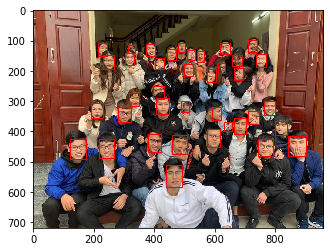

In [1]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

filename = 'C:/Users/T470/Downloads/1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

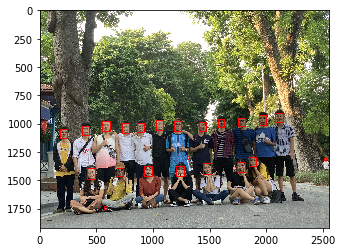

In [2]:
filename = 'data/test_mtCNN/2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

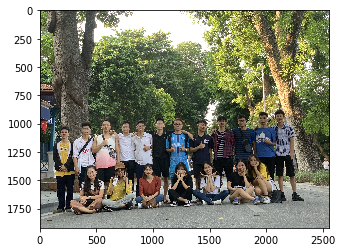

In [3]:
filename = 'data/test_mtCNN/2.jpg'
# load image from file
pyplot.figure(figsize=(27, 1920))
pixels = pyplot.imread(filename)
pyplot.imshow(pixels)

In [4]:
pixels.shape

(1920, 2560, 3)

In [1]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()

filename = 'C:/Users/T470/Downloads/1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

Using TensorFlow backend.


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/T470/Downloads/1.jpg'

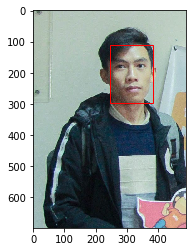

In [4]:
# filename = 'D:/data/VN-celeb/VN-celeb/1017/9.png'
filename='data/FV_test/ducnv/1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [19]:

# filename='data/FV_test/ducnv/1.jpg'
# load image from file
def detect(filename):
    pixels = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    # display faces on the original image
    draw_image_with_boxes(filename, faces)
    return np.asarray(faces)

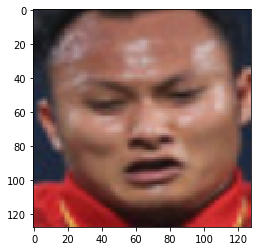

array([], dtype=float64)

In [20]:
filename = 'D:/data/VN-celeb/VN-celeb/1017/26.png'
detect(filename)

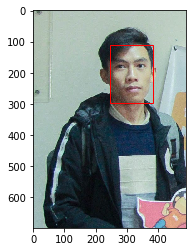

array([{'box': [246, 110, 138, 188], 'confidence': 0.9996591806411743, 'keypoints': {'left_eye': (282, 182), 'right_eye': (346, 178), 'nose': (319, 216), 'mouth_left': (296, 255), 'mouth_right': (346, 252)}}],
      dtype=object)

In [21]:
detect('data/FV_test/ducnv/1.jpg')

In [14]:
faces = np.asarray(faces)

In [22]:
dir = 'C:/Users/T470/OneDrive - Hanoi University of Science and Technology/Pictures/Camera Roll/'

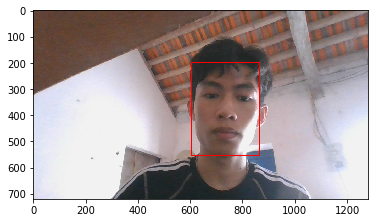

array([{'box': [602, 197, 262, 355], 'confidence': 0.9999381303787231, 'keypoints': {'left_eye': (685, 324), 'right_eye': (806, 331), 'nose': (747, 396), 'mouth_left': (688, 466), 'mouth_right': (786, 471)}}],
      dtype=object)

In [23]:
detect(dir+'7.jpg')

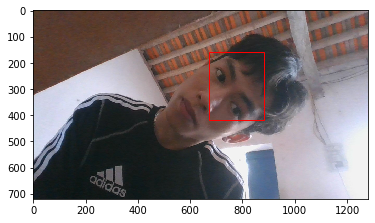

array([{'box': [673, 158, 208, 261], 'confidence': 0.7015800476074219, 'keypoints': {'left_eye': (742, 254), 'right_eye': (822, 258), 'nose': (776, 316), 'mouth_left': (743, 358), 'mouth_right': (808, 367)}}],
      dtype=object)

In [24]:
detect(dir+'8.jpg')

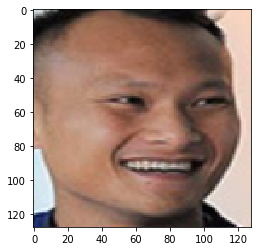

array([], dtype=float64)

In [25]:
detect('D:/data/VN-celeb/VN-celeb/1017/0.png')

In [26]:
import numpy as np


In [27]:
x = np.array([1, 2])
y = np.array([3, 4])

In [28]:
x.append(y)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [32]:
z = list()

In [34]:
z.append(x)

In [35]:
z

[array([1, 2]), array([1, 2])]

In [38]:
z = list()

In [39]:
z

[]

In [40]:
z.append(x)

In [41]:
z

[array([1, 2])]

In [42]:
z.append(y)

In [43]:
z

[array([1, 2]), array([3, 4])]

In [44]:
np.asarray(z)

array([[1, 2],
       [3, 4]])

In [1]:
len([1, 2, 3, 4])

4

In [ ]:
3 + 'r'